## In this file, visualizations are made to determine what columns should be included in my model predicting price.

In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load dataset
train = pd.read_csv('../datasets/train_cleaned.csv')

In [4]:
train.columns

Index(['Unnamed: 0', 'Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage',
       'Lot Area', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Fini

In [5]:
train.drop(columns = ["Unnamed: 0"], inplace = True)
train = train.fillna('NA')

### Part 1: Garage Visualizations

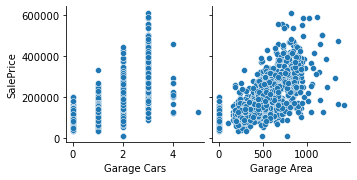

In [6]:
# Garage variables vs. price
sns.pairplot(train, x_vars = ['Garage Cars', 'Garage Area'], y_vars = ['SalePrice'])

Both the number of cars and the area of the garage look as if they have a positive linear relationship with sale price.

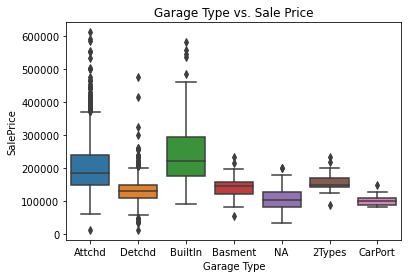

In [7]:
sns.boxplot(x = 'Garage Type', y = 'SalePrice', data = train)
plt.title("Garage Type vs. Sale Price");

Garages that are both above ground and attached to the house correlate with greater house prices, which is unsurprising given that the cost of making the garage directly connect to the house will add to the total cost of the house. Each of the six garage types is represented at least once in the training set.

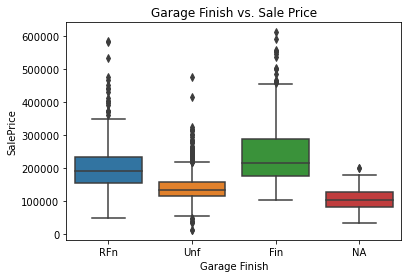

In [8]:
sns.boxplot(x = 'Garage Finish', y = 'SalePrice', data = train)
plt.title("Garage Finish vs. Sale Price");

The state of the interior finish of the garage correlates positively with house price.

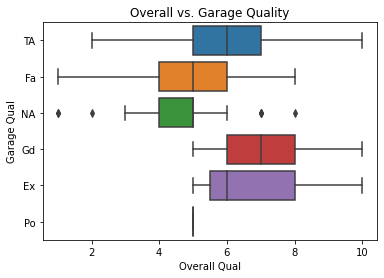

In [9]:
sns.boxplot(x = 'Overall Qual', y = 'Garage Qual', data = train)
plt.title("Overall vs. Garage Quality");

Garage quality largely correlates with overall quality, so only one of them will be included in my price model.

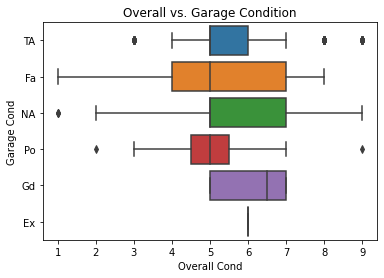

In [10]:
sns.boxplot(x = 'Overall Cond', y = 'Garage Cond', data = train)
plt.title("Overall vs. Garage Condition");

Garage condition correlates less with overall than garage quality does, but it correlates enough to have only one of garage and overall condition be included in my model.

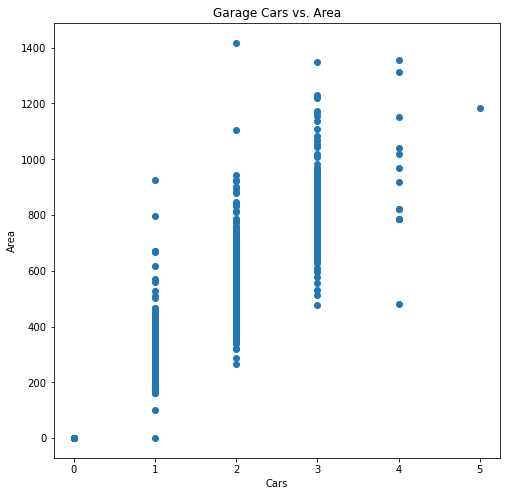

In [11]:
plt.figure(figsize = (8, 8))
plt.scatter(x = train['Garage Cars'], y = train['Garage Area'])
plt.title("Garage Cars vs. Area")
plt.xlabel("Cars")
plt.ylabel("Area");

It looks as if there is a strong positive correlation between the number of cars in a garage and its area. In order to avoid intercollinearity, I am only going to use cars as a predictor as it is more accessible to the average home-buyer than area is.

### Part 2: Supplemental Price Scatterplots

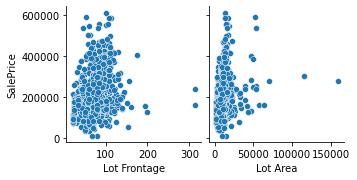

In [12]:
# Lot variables vs. price
sns.pairplot(train, x_vars = ['Lot Frontage', 'Lot Area'], y_vars = ['SalePrice'])

Neither lot frontage nor lot area have much of a linear relationship with price. In the case of lot frontage, the lack of correlation might be because I filled in random missing values with the mean of the dataset.

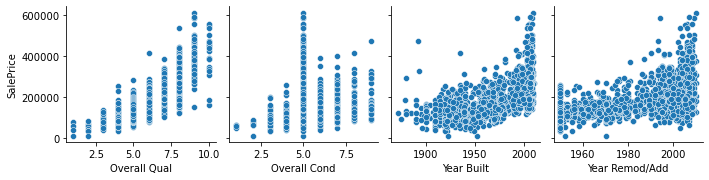

In [13]:
# General house variables vs. price
sns.pairplot(train, x_vars = ['Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add'], y_vars = ['SalePrice'])

All of these at least look like linear relationships.

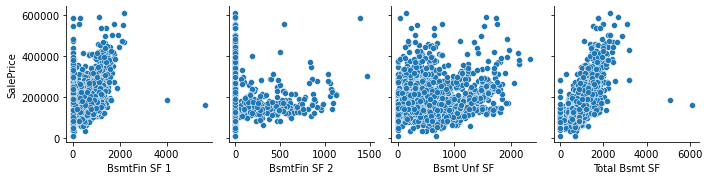

In [14]:
# Basement variables vs. price
sns.pairplot(train, x_vars = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF'], y_vars = ['SalePrice'])

Total basement area seems to have a strong linear relationship with price and Type 1 finished area has a weak one, but Type 2 finished area and unfinished area do not have a linear relationship with price at all.

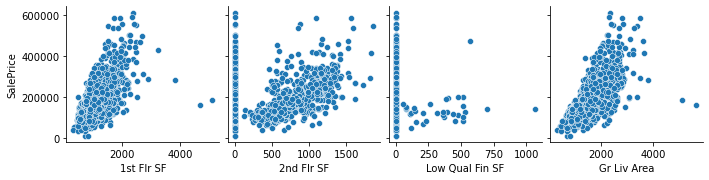

In [15]:
# Above ground variables vs. price
sns.pairplot(train, x_vars = ['1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area'], y_vars = ['SalePrice'])

All except for low quality finished square feet seem to have a linear relationship with price. The greater living area statistic has the highest correlation so that is what I will use as my predictor.

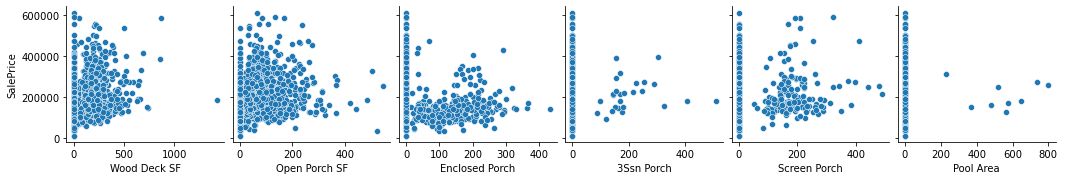

In [16]:
# Outside variables vs. price
sns.pairplot(train, x_vars = ['Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', 
                              '3Ssn Porch', 'Screen Porch', 'Pool Area'], y_vars = ['SalePrice'])

The only variable relating to outside amenities that even slightly looks like it has a linear relationship with price is the screen porch area.

### Part 3: Supplemental Price Boxplots

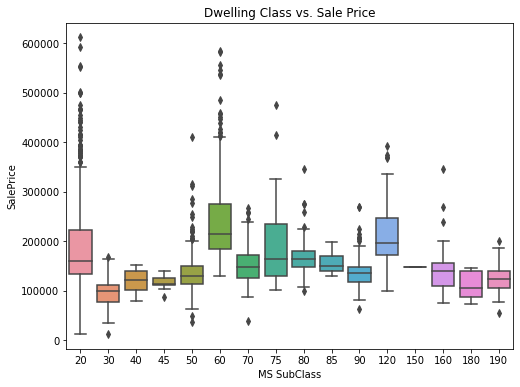

In [17]:
plt.figure(figsize = (8, 6))
sns.boxplot(x = 'MS SubClass', y = 'SalePrice', data = train)
plt.title("Dwelling Class vs. Sale Price");

Of the dwelling classes, the ones that appear to lead to higher prices are 20 (1-story newer), 60 (2-story newer), 75 (2.5-story), and 120 (1-story PUD newer). Since three of them are affected by the year built, it appears that it is year built, not dwelling type, that has an effect on price.

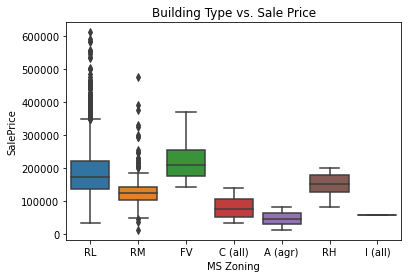

In [18]:
sns.boxplot(x = 'MS Zoning', y = 'SalePrice', data = train)
plt.title("Building Type vs. Sale Price");

Residential buildings (RL, RM, FV, and RH) appear to be more expensive than agricultural (A), commercial (C), or industrial (I) buildings.

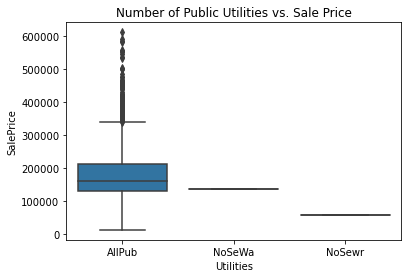

In [19]:
sns.boxplot(x = 'Utilities', y = 'SalePrice', data = train)
plt.title("Number of Public Utilities vs. Sale Price");

Since most houses have all public utilities, the number of utilities is not a good predictor of price.

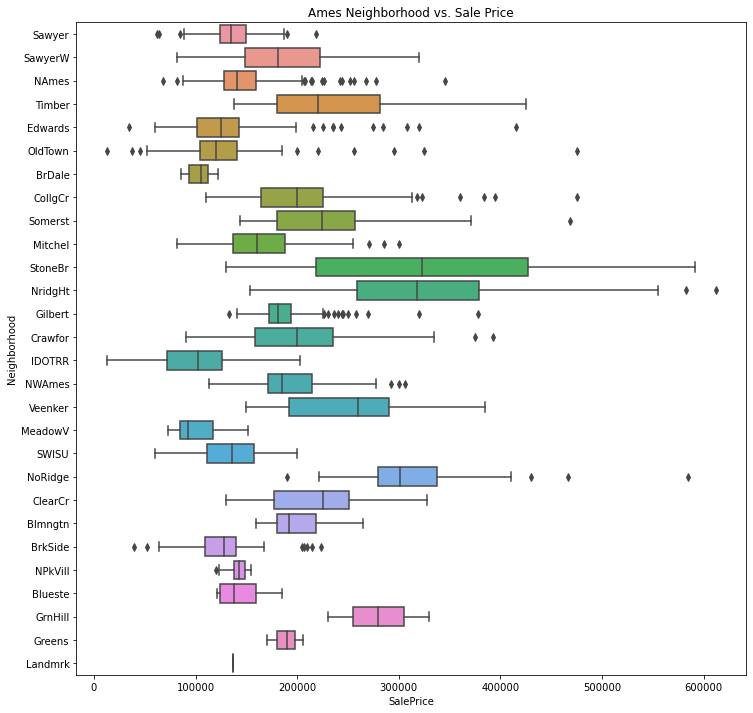

In [20]:
plt.figure(figsize = (12, 12))
sns.boxplot(y = 'Neighborhood', x = 'SalePrice', data = train)
plt.title("Ames Neighborhood vs. Sale Price");

The major neighborhoods where the price is high are Stone Brook, Northridge Heights, Northridge, Green Hills, Veenker, and Timberland.

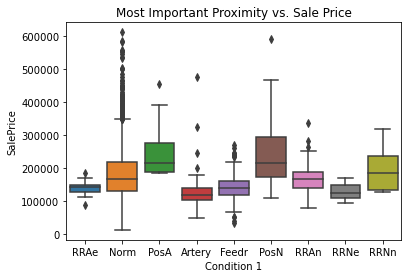

In [21]:
sns.boxplot(x = 'Condition 1', y = 'SalePrice', data = train)
plt.title("Most Important Proximity vs. Sale Price");

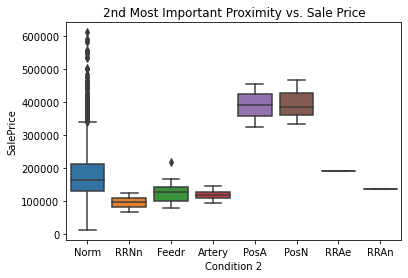

In [22]:
sns.boxplot(x = 'Condition 2', y = 'SalePrice', data = train)
plt.title("2nd Most Important Proximity vs. Sale Price");

Proximity to a positive off-site feature increases price for Condition 1 and massively increases it for Condition 2.

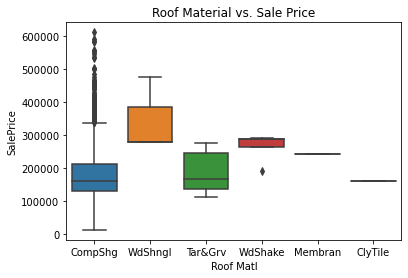

In [23]:
sns.boxplot(x = 'Roof Matl', y = 'SalePrice', data = train)
plt.title("Roof Material vs. Sale Price");

Houses with wood shingles and wood shakes are generally more expensive than those with other types of roof material, though some houses with composite shingles are more expensive than any with wood shingles or wood shakes.

### Part 3: Correlation Checks

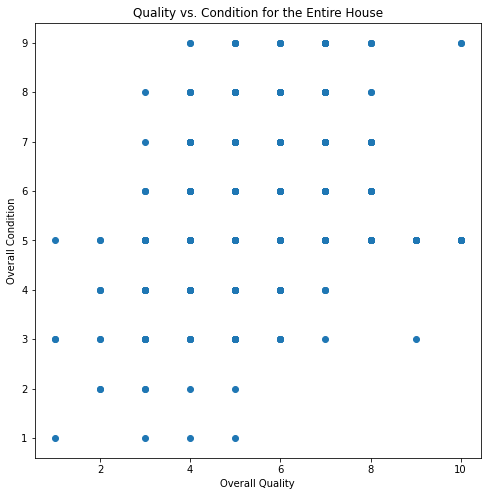

In [24]:
plt.figure(figsize = (8, 8))
plt.scatter(x = train['Overall Qual'], y = train['Overall Cond'])
plt.title("Quality vs. Condition for the Entire House")
plt.xlabel("Overall Quality")
plt.ylabel("Overall Condition");

Overall quality and overall condition do not seem to have much correlation, implying that both can be used as predictors.

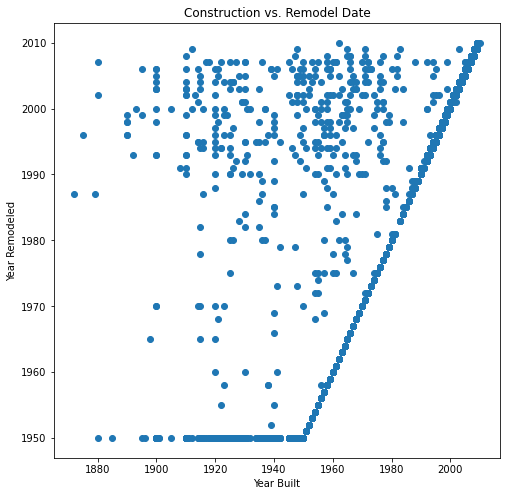

In [25]:
plt.figure(figsize = (8, 8))
plt.scatter(x = train['Year Built'], y = train['Year Remod/Add'])
plt.title("Construction vs. Remodel Date")
plt.xlabel("Year Built")
plt.ylabel("Year Remodeled");

Despite the lack of apparent correlation, it is clear that year built is multi-collinear with year remodeled after 1950.